## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing dataset

In [2]:
dataset = pd.read_csv('Wholesale_customers_data.csv')

In [3]:
dataset.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

## Checking if there are missing values in the dataset for each column

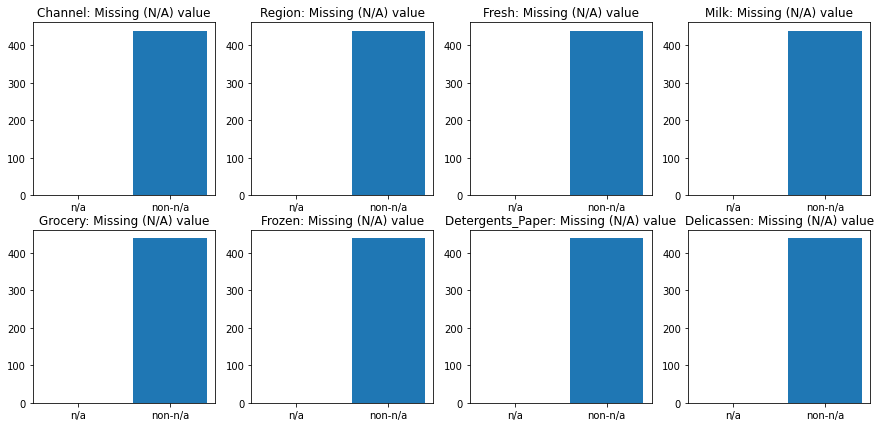

In [4]:
plt.figure(figsize = (15, 7))
isnull = dataset.isnull()
cols = dataset.columns
x_isnull = ['n/a', 'non-n/a']
num_features = len(cols)
for i in range(1, num_features + 1):
    plt.subplot(2, 4, i)
    column_isnull = isnull.iloc[:, i - 1].values
    num_null = column_isnull.tolist().count(True)
    num_nonnull = column_isnull.tolist().count(False)
    null_count = [num_null, num_nonnull]
    plt.bar(x_isnull, null_count)
    plt.title(cols[i - 1]+': Missing (N/A) value')
plt.show()

In [5]:
X = dataset

# Using the elbow method to find the optimal number of clusters


<function matplotlib.pyplot.show>

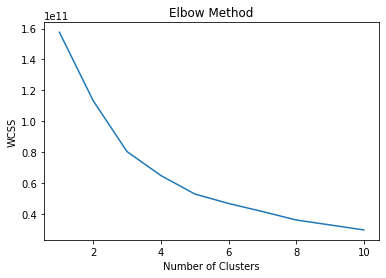

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  km.fit(X)
  wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show

# Training the K-Means model on the dataset

In [7]:
kmeans = KMeans(n_clusters = 5 , init = 'k-means++', random_state = 0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

# Showing the labels each point belongs to

In [8]:
labels = kmeans.labels_
print(labels)

[1 1 1 1 3 1 1 1 1 2 2 1 3 3 3 1 2 1 3 1 3 1 3 2 3 3 1 1 2 3 3 1 3 3 1 1 3
 2 2 0 3 3 2 2 1 2 2 4 1 2 1 1 3 2 3 1 2 2 1 1 1 4 1 2 1 4 1 3 1 1 3 3 1 3
 1 3 1 2 1 1 1 2 1 3 1 4 4 0 1 3 1 1 2 1 2 1 1 1 1 1 2 2 1 0 1 3 2 2 1 2 1
 2 3 1 3 1 1 1 3 1 3 1 1 1 3 0 3 3 1 3 1 1 1 1 1 1 1 1 1 1 3 3 3 1 3 2 1 1
 1 3 3 1 3 1 1 2 2 3 1 2 1 1 1 2 1 2 1 1 1 1 2 2 1 2 1 2 0 1 1 1 1 0 2 0 1
 1 1 1 2 2 3 1 1 2 1 3 3 1 1 1 2 2 3 1 1 2 1 1 1 2 3 4 1 1 2 2 2 3 2 1 1 1
 1 1 1 1 3 1 1 1 1 1 3 1 3 1 1 3 1 0 3 3 3 1 1 2 1 1 3 1 1 2 1 3 1 3 1 1 0
 0 1 1 3 1 2 2 2 3 2 1 1 1 1 3 1 1 3 1 1 3 1 1 0 3 0 3 1 3 3 3 1 1 1 2 3 1
 3 1 1 1 3 2 1 2 2 2 2 3 1 2 1 3 2 1 1 2 1 1 1 2 1 1 3 1 3 0 1 1 3 1 1 2 3
 4 3 3 1 1 1 1 1 1 1 2 1 1 2 3 1 2 1 2 1 2 1 1 3 2 1 1 3 1 1 1 1 1 1 1 3 1
 3 3 1 3 1 1 2 3 1 1 3 3 3 1 2 1 1 3 1 1 1 1 1 3 1 1 2 1 1 1 1 3 3 3 3 1 3
 2 1 1 1 1 1 1 1 1 2 1 2 1 2 3 3 3 3 1 2 3 1 1 2 1 3 1 3 3 3 2 1 1]


# Apply PCA (Principal Component Analysis)to the dataset

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state = 0)
X_pca = pca.fit_transform(X)

## Training the K-Means model on the dataset (PCA)

In [10]:
kmeans = KMeans(n_clusters = 5 , init = 'k-means++', random_state = 0)
labels_pca = kmeans.fit_predict(X_pca)

## Visualizing the clusters

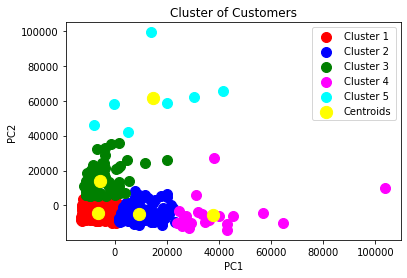

In [11]:
plt.scatter(X_pca[labels_pca == 0, 0], X_pca[labels_pca == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_pca[labels_pca == 1, 0], X_pca[labels_pca == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_pca[labels_pca == 2, 0], X_pca[labels_pca == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_pca[labels_pca == 3, 0], X_pca[labels_pca == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(X_pca[labels_pca == 4, 0], X_pca[labels_pca == 4, 1], s = 100, c = 'cyan', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centroids')
plt.title('Cluster of Customers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Adding the clutering columns to the original dataset

In [29]:
dataset['Cluster_PCA'] = labels_pca

In [14]:
dataset.head()

Channel  Region  Fresh  Milk  ...  Frozen  Detergents_Paper  Delicassen  Cluster
0        2       3  12669  9656  ...     214              2674        1338        0
1        2       3   7057  9810  ...    1762              3293        1776        0
2        2       3   6353  8808  ...    2405              3516        7844        0
3        1       3  13265  1196  ...    6404               507        1788        0
4        2       3  22615  5410  ...    3915              1777        5185        1

[5 rows x 9 columns]

# Clustering beween Fresh and Frozen

In [63]:
X_2D = dataset.loc[:, ['Fresh', 'Frozen']].values

## Searching the optimal number of clusters

<function matplotlib.pyplot.show>

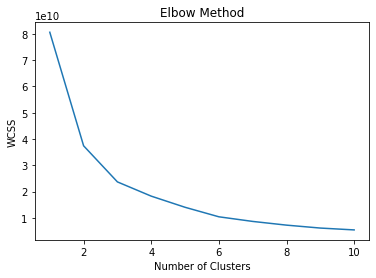

In [64]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  km.fit(X_2D)
  wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show

## Training the K-Means model

In [65]:
kmeans_2D = KMeans(n_clusters = 3 , init = 'k-means++', random_state = 0)
labels_2D = kmeans_2D.fit_predict(X_2D)

## Visualizing the clusters

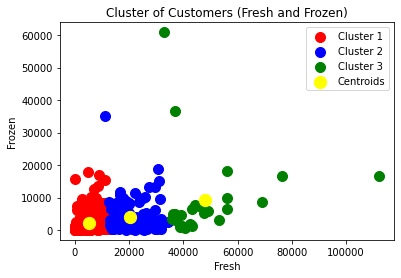

In [66]:
plt.scatter(X_2D[labels_2D == 0, 0], X_2D[labels_2D == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_2D[labels_2D == 1, 0], X_2D[labels_2D == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_2D[labels_2D == 2, 0], X_2D[labels_2D == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans_2D.cluster_centers_[:, 0], kmeans_2D.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centroids')
plt.title('Cluster of Customers (Fresh and Frozen)')
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.legend()
plt.show()